In [1]:
#pip install praw

In [2]:
#pip install wordcloud

In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#import libraries for machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

#import libraries for sentiment analysis
import praw
import re
from textblob import TextBlob
from wordcloud import WordCloud
import requests
import time
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import string

In [4]:
# Download necessary NLTK data
nltk.download([
     "names",
     "stopwords",
    "state_union",
    "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\a-ldrumm\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a-ldrumm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\a-ldrumm\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\a-ldrumm\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\a-ldrumm\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\a-ldrumm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_ta

True

#### I Want to Classify Every EU Country into 1 of 3 Categories: Low, Medium or High based on how many Bovine Livestock they Have  and see which Category Ireland Falls into.

In [5]:
Livestock_df = pd.read_csv("EU_Livestock_2010.csv")

In [6]:
Livestock_df.head()

,ISO3,Animals,Month,Unit,Geo,Year,value
0,AUT,A2000,M12,THS_HD,AT,2010,2013.28
1,BEL,A2000,M12,THS_HD,BE,2010,2509.54
2,BGR,A2000,M12,THS_HD,BG,2010,553.70
3,CYP,A2000,M12,THS_HD,CY,2010,54.72
4,CZE,A2000,M12,THS_HD,CZ,2010,1319.41


In [7]:
#retain country and value column only
countries_df = Livestock_df[['ISO3', 'value']]

In [8]:
countries_df.head()

,ISO3,value
0,AUT,2013.28
1,BEL,2509.54
2,BGR,553.70
3,CYP,54.72
4,CZE,1319.41


In [9]:
countries_df.shape

(415, 2)

In [10]:
# Function to categorize lievstock population into 4 categories
def categorize_countries(value):
    quantiles = countries_df['value'].quantile([0.25, 0.5, 0.75]).to_list()
    if value <= quantiles[0]:
        return 'Very Low'
    elif value <= quantiles[1]:
        return 'Low'
    elif value <= quantiles[2]:
        return 'Medium'
    else:
        return 'High'

In [11]:
countries_df.shape

(415, 2)

In [12]:
#apply function
countries_df['category'] = countries_df['value'].apply(categorize_countries)

countries_df.head()

C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_29112\3947123076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['category'] = countries_df['value'].apply(categorize_countries)


,ISO3,value,category
0,AUT,2013.28,Medium
1,BEL,2509.54,Medium
2,BGR,553.70,Low
3,CYP,54.72,Very Low
4,CZE,1319.41,Low


In [13]:
countries_df.shape

(415, 3)

In [14]:
# Encode the target variable
label_encoder = LabelEncoder()

countries_df['category_encoded'] = label_encoder.fit_transform(countries_df['category'])

# Split the data into training and testing sets
X = countries_df[['value']]
y = countries_df['category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_29112\3044246663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['category_encoded'] = label_encoder.fit_transform(countries_df['category'])


((332, 1), (83, 1), (332,), (83,))

In [15]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

In [16]:
# Define parameter grid for RandomizedSearchCV
param_dist = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [17]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [18]:
# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [19]:
# Predict on the test set 
y_pred = random_search.predict(X_test)

# Classification report
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [20]:
print(classification_report_str)

              precision    recall  f1-score   support

        High       0.95      1.00      0.98        21
         Low       1.00      1.00      1.00        17
      Medium       1.00      0.96      0.98        26
    Very Low       1.00      1.00      1.00        19

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



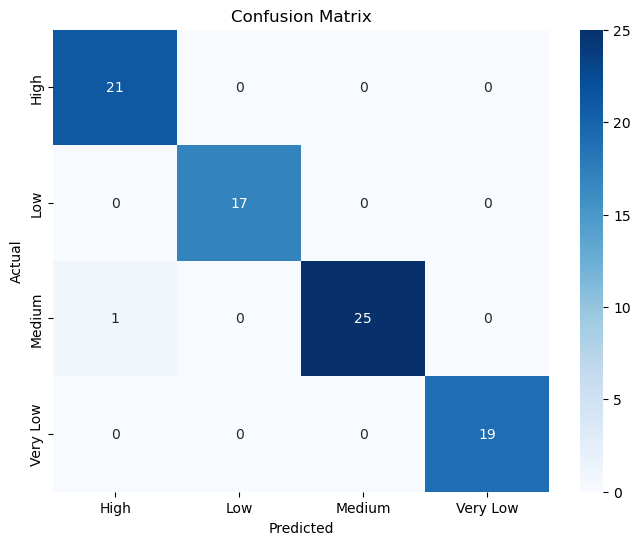

In [21]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Remove rows with missing ISO3 values
countries_df_clean= countries_df.dropna(subset=['ISO3'])

# Group by country and find the mode category
mode_categories = countries_df_clean.groupby('ISO3')['category'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_categories.columns = ['ISO3', 'Mode_Category']

# Create a dictionary to hold the lists of countries for each quantile category
quantile_dict = {'Very Low': [], 'Low': [], 'Medium': [], 'High': []}

# Populate the dictionary with the countries based on their mode category
for _, row in mode_categories.iterrows():
    quantile_dict[row['Mode_Category']].append(row['ISO3'])

# Find the maximum length of the lists
max_length = max(len(v) for v in quantile_dict.values())

# Ensure they are of equal length
for key in quantile_dict:
    quantile_dict[key] += [''] * (max_length - len(quantile_dict[key]))

# Convert the dictionary to a DataFrame
quantile_df = pd.DataFrame(quantile_dict)

# Define colors for each quantile category
pastel_colors = {
    'Very Low': '#ecc6d9',  # light pink
    'Low': '#cce5ff',       # light blue
    'Medium': '#d4edda',    # light green
    'High': '#fff3cd'       # light yellow
}

# Apply the styling
styled_df = quantile_df.style.applymap(lambda x: f'background-color: {pastel_colors["Very Low"]}', subset=['Very Low'])
styled_df = styled_df.applymap(lambda x: f'background-color: {pastel_colors["Low"]}', subset=['Low'])
styled_df = styled_df.applymap(lambda x: f'background-color: {pastel_colors["Medium"]}', subset=['Medium'])
styled_df = styled_df.applymap(lambda x: f'background-color: {pastel_colors["High"]}', subset=['High'])

# Display DataFrame
styled_df

,Very Low,Low,Medium,High
0,CYP,BGR,AUT,DEU
1,EST,CZE,BEL,ESP
2,HRV,FIN,CHE,FRA
3,ISL,GRC,DNK,IRL
4,LUX,HUN,NLD,ITA
5,LVA,LTU,PRT,POL
6,MLT,SVN,ROU,
7,SVK,,SWE,


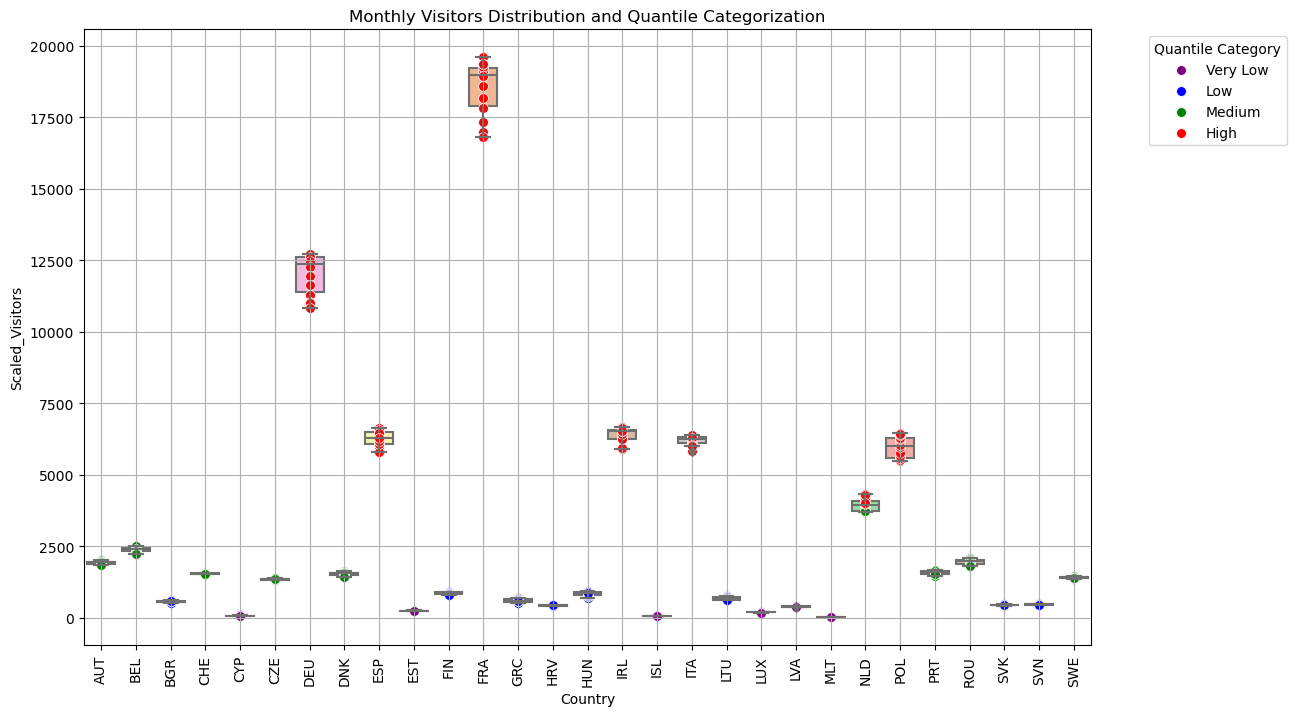

In [23]:
# Ensure consistent order of ISO3 categories
iso3_order = sorted(countries_df_clean['ISO3'].unique())

# Create a box plot to show the distribution of livestock population
plt.figure(figsize=(13, 8))
sns.boxplot(x='ISO3', y='value', data=countries_df_clean, palette='pastel', order=iso3_order)

# Assign colors to each category
quantile_colors = {'Very Low': 'purple', 'Low': 'blue', 'Medium': 'green', 'High': 'red'}

# Add scatter plots to show individual countries for each quantile
for quantile, color in quantile_colors.items():
    # Filter data for each category
    quantile_data = countries_df_clean[countries_df_clean['category'] == quantile]
    # Map ISO3 to numerical positions
    x_positions = [iso3_order.index(country) for country in quantile_data['ISO3']]
    sns.scatterplot(x=x_positions, y=quantile_data['value'], color=color, label=quantile, s=50)

# Set the order of the x-axis to match the box plot
plt.xticks(ticks=range(len(iso3_order)), labels=iso3_order, rotation=90)

# Label and plot graph
plt.title('Monthly Visitors Distribution and Quantile Categorization')
plt.xlabel('Country')
plt.ylabel('Scaled_Visitors')
plt.legend(title='Quantile Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

## What will the Total Value of All Livestock and Crops be in 2024 Ireland?

In [77]:
ireland_df = pd.read_csv("MLdata.csv")

In [78]:
ireland_df.head()

,Statistic Label,Year,State,UNIT,VALUE,Adjusted Value
0,All Livestock,2023,State,Euro Million,4570.987090,4570.987090
1,All Livestock,2021,State,Euro Million,3992.818325,4363.735874
2,All Livestock Products,2023,State,Euro Million,3628.307426,3628.307426
3,All Livestock,2020,State,Euro Million,3606.839299,4043.541815
4,All Livestock,2017,State,Euro Million,3588.180788,4133.848834


In [79]:
# Aggregate all values for each year
aggregated_df = ireland_df.groupby('Year')['Adjusted Value'].sum().reset_index()


# Prepare the data for linear regression
X = aggregated_df[['Year']]
y = aggregated_df['Adjusted Value']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the value for 2024
year_2024 = np.array([[2024]])
predicted_value_2024 = model.predict(year_2024)

predicted_value_2024

C:\Users\a-ldrumm\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17713.63393414])

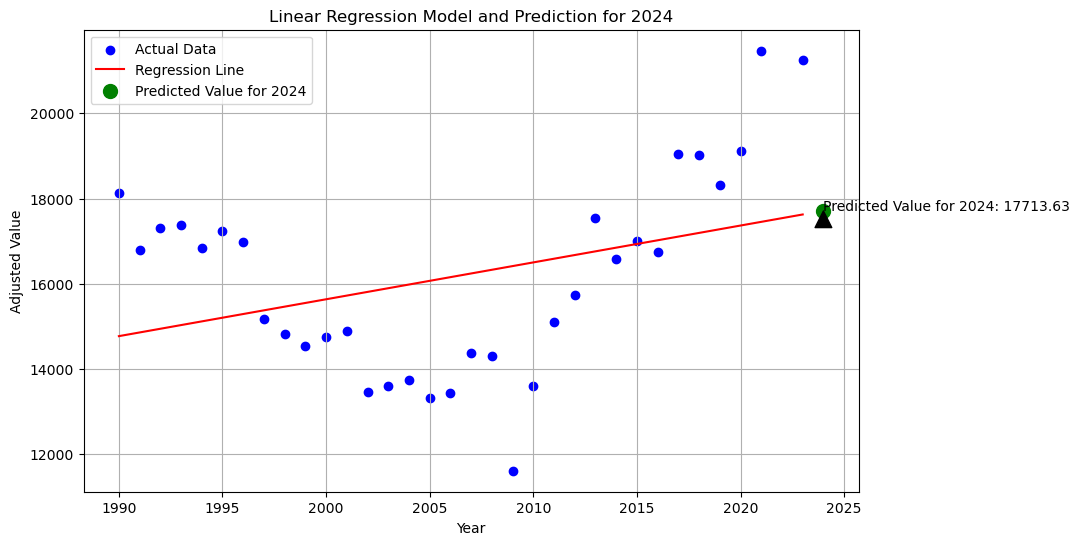

In [80]:
# Visualize the data and the model
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['Year'], aggregated_df['Adjusted Value'], color='blue', label='Actual Data')
plt.plot(aggregated_df['Year'], model.predict(X), color='red', label='Regression Line')
plt.scatter(2024, predicted_value_2024, color='green', label='Predicted Value for 2024', s=100)

# Annotate the predicted value
plt.annotate(f'Predicted Value for 2024: {predicted_value_2024[0]:.2f}', xy=(2024, predicted_value_2024), 
             xytext=(2024, predicted_value_2024 + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Year')
plt.ylabel('Adjusted Value')
plt.title('Linear Regression Model and Prediction for 2024')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
#ireland_df["Year"]=pd.to_datetime(ireland_df["Year"])

In [82]:
aggregated_data = ireland_df.groupby('Year')['Adjusted Value'].sum().reset_index()

In [83]:
# Split the data into features and targets
X = aggregated_data[['Year']]
y = aggregated_data['Adjusted Value']

In [84]:
# Craete training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33, 1), (33,), (26, 1), (7, 1), (26,), (7,))

In [85]:
# Define the model
model = DecisionTreeRegressor(random_state=42)

# set the parameter grid
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],}

In [86]:
# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid , cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on X_train and y_train
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [87]:
#Make predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse}")

# Calculate R squared
r_squared = r2_score(y_test, y_pred)
print(f"Test R2:r_squared:{r_squared}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Test RMSE: 1238.5097741551645
Test R2:r_squared:0.8189489071980389
Test MSE: 1533906.4606778766


In [88]:
# Prediction for 2024
prediction_input = pd.DataFrame({'Year': [2024]})

# Predict using the optimized model
predicted_agri_value_2024 = grid_search.best_estimator_.predict(prediction_input)

print("Predicted livestock and crops agriculture value in Ireland 2024 (Euro Million):", predicted_agri_value_2024[0])

Predicted livestock and crops agriculture value in Ireland 2024 (Euro Million): 21252.470981579696


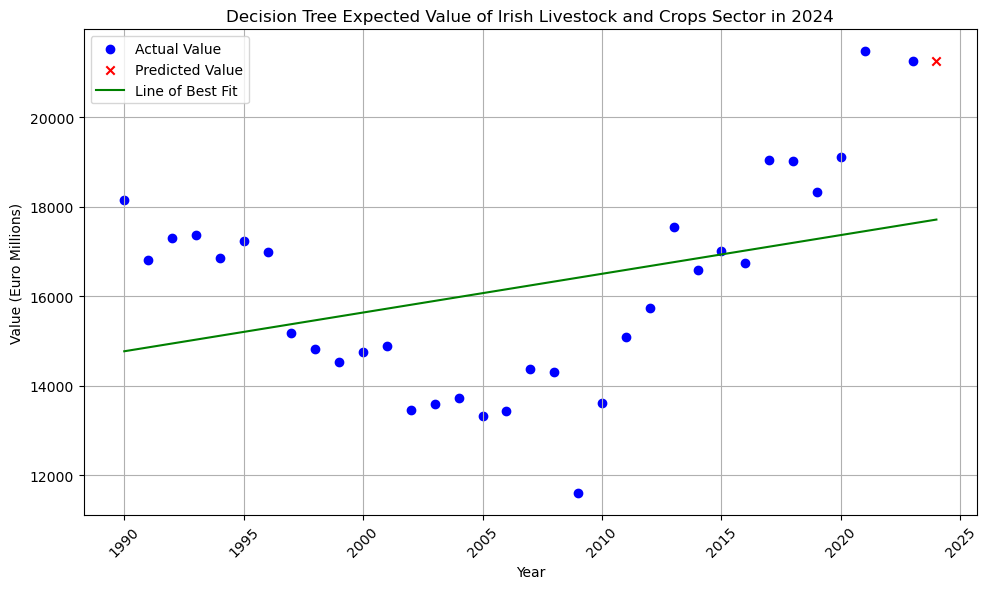

In [89]:
# Convert 'Year' to numerical format for regression

#assign figure size
plt.figure(figsize=(10, 6))

# Plotting the actual value as a scatter plot
plt.scatter(aggregated_data['Year'], aggregated_data['Adjusted Value'], label='Actual Value', color='blue', marker='o')


# Plotting the predicted agri value for 2024
plt.scatter([2024], predicted_agri_value_2024, label='Predicted Value', color='red', marker='x')

# Calculate the line of best fit
slope, intercept = np.polyfit(aggregated_data['Year'], aggregated_data['Adjusted Value'], 1)
line_x = np.arange(aggregated_data['Year'].min(), 2025)
line_y = slope * line_x + intercept

# Plot the line of best fit
plt.plot(line_x, line_y, color='green', label='Line of Best Fit')


#plot graph
plt.title('Decision Tree Expected Value of Irish Livestock and Crops Sector in 2024')
plt.xlabel('Year')
plt.ylabel('Value (Euro Millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [90]:
# Define the model
model2 = RandomForestRegressor()

# set the parameter grid
param_grid = {'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],}


In [91]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit to data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Make predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate R^2 
r_squared = r2_score(y_test, y_pred)
print(f"Test R2: {r_squared}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Best parameters: {'max_depth': 10, 'n_estimators': 300}
Test R2: 0.7627052127358593
Test RMSE: 1417.8913794805264
Test MSE: 2010415.9640051902


In [92]:
# Predict arrivals for July 2024
predicted_value_2024 = grid_search.predict([[2024]])

print(f"Predicted livestock and crops agriculture value in Ireland 2024 (Euro Million): {predicted_value_2024}")

Predicted livestock and crops agriculture value in Ireland 2024 (Euro Million): [20397.33737765]


C:\Users\a-ldrumm\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


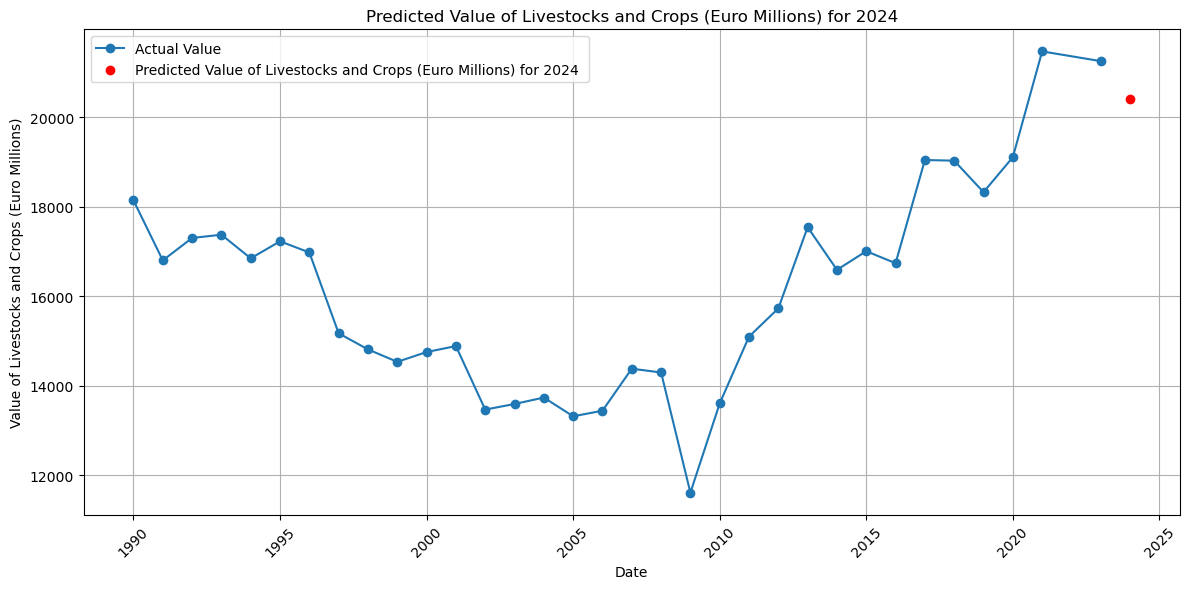

In [93]:
predicted_date = 2024
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['Year'], aggregated_data['Adjusted Value'], marker='o', linestyle='-', label='Actual Value')
plt.scatter(predicted_date, predicted_value_2024, color='red', label='Predicted Value of Livestocks and Crops (Euro Millions) for 2024 ', zorder=5)

plt.title('Predicted Value of Livestocks and Crops (Euro Millions) for 2024')
plt.xlabel('Date')
plt.ylabel('Value of Livestocks and Crops (Euro Millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sentiment Analysis

In [42]:
# Reddit app details that will collect posts
reddit = praw.Reddit(
    client_id='zOCHP4_tb7MOpNKrETQzeg', 
    client_secret='ULEHnbao_hnZNp6FE9GU8Pwu0GfUUA', 
    user_agent='script:AgricultureSentimentAnalysis:v1.0 (by /u/Lolly-1)' 
)

In [43]:
# Define the search parameters
subreddits = ['ireland', 'europeanunion', 'agriculture', 'farming']
queries = {
    'ireland': 'crop export value impact 2022',
    'europeanunion': ['crop export value impact 2022','CAP'],
    'farming':['CAP','profit','crop value 2022']


} 
search_limit = 500

In [44]:
# Define the search parameters
subreddits = ['agriculture value', 'farming', 'livestock','crops']
queries = {
    'agriculture': ['CAP','profit','crop value increase','crop value ','crop production in the EU','Irish crop value','Irish agricultural imports and exports','Ireland farming economy'],
    'farming': ['crop value','crisis', 'cost value increase','crop production in the EU','CAP', 'crop value','crop production in the EU'],
}
search_limit = 5000

In [45]:
# Function to collect data from Reddit using praw,  rate limiting and exception handling later added to manage the process
def collect_reddit_data(subreddits, queries, search_limit):
    posts = []
    for subreddit in subreddits:
        subreddit_instance = reddit.subreddit(subreddit)
        for country, query in queries.items():
            try:
                for submission in subreddit_instance.search(query, limit=search_limit):
                    posts.append([country, submission.title, submission.selftext, submission.subreddit.display_name, submission.created_utc])
                    submission.comments.replace_more(limit=0)
                    for comment in submission.comments.list():
                        posts.append([country, comment.body, '', submission.subreddit.display_name, comment.created_utc])
            except praw.exceptions.APIException as e:
                if e.error_type == 'RATELIMIT':
                    print(f"Rate limit exceeded. Sleeping for {e.sleep_time} seconds.")
                    time.sleep(e.sleep_time)
                else:
                    raise e
            except Exception as e:
                print(f"An error occurred: {e}")
                time.sleep(10)  
    return pd.DataFrame(posts, columns=['country', 'title', 'body', 'subreddit', 'created_utc'])

In [46]:
# Collect  the data by applying function above
data = collect_reddit_data(subreddits, queries, search_limit)

An error occurred: received 404 HTTP response
An error occurred: received 404 HTTP response


In [47]:
#check amount of data collected
data.shape

(3520, 5)

In [48]:
# Function to filter data to focus on specific key words
def preprocess_data(data):
    keywords = ['crop export value', 'price impact', '2022', 'farmers', 'consumers', 'Ireland', 'EU', 'Europe']
    pattern = re.compile('|'.join(keywords), re.IGNORECASE)
    filtered_data = data[data['title'].apply(lambda x: bool(pattern.search(x)))]
    return filtered_data

In [49]:
# Apply the function
data = preprocess_data(data)

In [50]:
# Remove duplicates
data.drop_duplicates(subset=['title', 'body'], keep='first', inplace=True)

In [51]:
# Drop missing values 
data.dropna(subset=['title', 'body'], inplace=True)

In [52]:
#insoect contents
data.describe(include = object)

,country,title,body,subreddit
count,417,417,417,417
unique,2,417,17,2
top,farming,"I completely agree, farm subsidies have stifl...",,farming
freq,238,1,401,414


In [53]:
data.shape

(417, 5)

In [54]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# use punctuation tool
punct = string.punctuation

# Initialise an object using PorterStemmer
stemmer = PorterStemmer()

In [55]:
# Store the column of the dataframe 
X = data['title']

# Display the value "X"
print(X)

1       I completely agree,  farm subsidies have stifl...
2       All 3 practices are subsidized heavily for far...
6       "300,000 fewer farmers than there were 20 year...
16      There's never a point that the main farmers ha...
19      Statistics like that always get thrown around,...
                              ...                        
3465    ah, where I live farm to table is just a bit o...
3474    This is the question that plagues all new farm...
3492             Suckler cow and Sheep farming in Ireland
3501    They’re very, very uncommon in Ireland so seei...
3506    Thank you, Modern-Moo, for voting on JustAnAlp...
Name: title, Length: 417, dtype: object


In [56]:
cleaned_data=[]

# craete a loop to clean the data

for i in range(len(X)):
    post = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    post = post.lower().split()
    post = [stemmer.stem(word) for word in post if (word not in stop_words) and (word not in punct)]
    post = ' '.join(post)
    cleaned_data.append(post)

In [57]:
cleaned_data

['complet agre farm subsidi stifl earn potenti adopt new innov farm practic regen agricultur till use cover crop would much widespread practic farmer reli heavili subsidi guid farm decis',
 'practic subsid heavili farmer tri adopt guess area clinat work work us world want cheap reliabl food sourc current model work pretti well hope tri get better',
 'fewer farmer year ago know often time sub make small famili farm irrelev wast time',
 'never point main farmer ever said famili farm consid famili farmer',
 'statist like alway get thrown around easi manipul gener gotten princip oper often fail take account multigener farm youngest farmer may consid princip oper depsit farmer thing skew decreas farmer number hire hand larger commerci oper huge there deni often multipl employe desir peopl contribut rural economi function differ farmer oper acr farmer oper acr hire men put job local economi oversimplif know glare issu fewer farmer x year ago sound bite deriv realiti',
 'sad consid small farm

In [58]:
# Convert cleaned data back to a DataFrame
cleaned_df = pd.DataFrame(cleaned_data, columns=['cleaned_title'])

# Function to calculate sentiment scores
def calculate_sentiment(text):
    if text.strip() == "":
        return None
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply sentiment analysis to the cleaned data
cleaned_df['title_sentiment'] = cleaned_df['cleaned_title'].apply(calculate_sentiment)

# Display data with sentiment scores 
cleaned_df[['cleaned_title', 'title_sentiment']].head(20)

,cleaned_title,title_sentiment
0,complet agre farm subsidi stifl earn potenti a...,0.168182
1,practic subsid heavili farmer tri adopt guess ...,0.300000
2,fewer farmer year ago know often time sub make...,-0.250000
3,never point main farmer ever said famili farm ...,0.166667
4,statist like alway get thrown around easi mani...,0.050000
5,sad consid small farmer use drive mani small t...,-0.250000
6,issu exist mind peopl unwil admit farmer lazi ...,0.200000
7,got backward babi boomer children want farm le...,-0.021429
8,would label drive gmo marketplac ubiquit label...,-0.097279
9,definit definit farmer union definit famili fa...,-0.166667


In [59]:
# Filter the DataFrame based on sentiment scores
positive = cleaned_df[cleaned_df['title_sentiment'] > 0]
negative = cleaned_df[cleaned_df['title_sentiment'] < 0]
neutral = cleaned_df[cleaned_df['title_sentiment'] == 0]

# Calculate counts and average scores for each sentiment category
positive_count = positive.shape[0]
negative_count = negative.shape[0]
neutral_count = neutral.shape[0]

positive_avg = positive['title_sentiment'].mean()
negative_avg = negative['title_sentiment'].mean()
neutral_avg = neutral['title_sentiment'].mean()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'sentiment_category': ['positive', 'negative', 'neutral'],
    'count': [positive_count, negative_count, neutral_count],
    'avg_score': [positive_avg, negative_avg, neutral_avg]
})

# Display the summary
print(summary_df)

  sentiment_category  count  avg_score
0           positive    244   0.181591
1           negative    100  -0.126552
2            neutral     73   0.000000


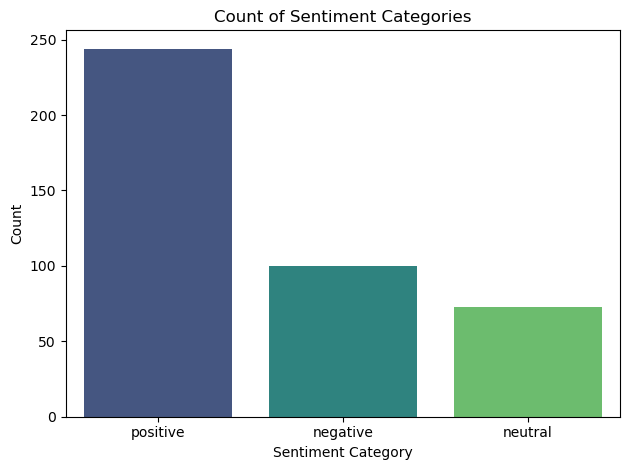

In [60]:
# Bar plot for sentiment counts
sns.barplot(x='sentiment_category', y='count', data=summary_df, palette='viridis')
plt.title('Count of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Display 
plt.tight_layout()
plt.show()

### Producers Vs Consumers

In [61]:
# Define the search parameters
subreddits = ['ireland', 'europeanunion', 'agriculture', 'farming']
queries = {
    'ireland': 'crop export value impact 2022',
    'europeanunion': ['crop export value impact 2022','CAP'],
    'farming':['CAP','profit','crop value 2022']


} 
search_limit = 1000

In [62]:
# Function to collect data from Reddit 
def collect_reddit_data(subreddits, queries, search_limit):
    posts = []
    for subreddit in subreddits:
        subreddit_instance = reddit.subreddit(subreddit)
        for country, query in queries.items():
            try:
                for submission in subreddit_instance.search(query, limit=search_limit):
                    posts.append([country, submission.title, submission.selftext, submission.subreddit.display_name, submission.created_utc])
                    submission.comments.replace_more(limit=0)
                    for comment in submission.comments.list():
                        posts.append([country, comment.body, '', submission.subreddit.display_name, comment.created_utc])
            except praw.exceptions.APIException as e:
                if e.error_type == 'RATELIMIT':
                    print(f"Rate limit exceeded. Sleeping for {e.sleep_time} seconds.")
                    time.sleep(e.sleep_time)
                else:
                    raise e
            except Exception as e:
                print(f"An error occurred: {e}")
                time.sleep(10)  # Sleep for a short time before retrying
    return pd.DataFrame(posts, columns=['country', 'title', 'body', 'subreddit', 'created_utc'])

In [63]:
# Collect data
data = collect_reddit_data(subreddits, queries, search_limit)

An error occurred: received 429 HTTP response


In [64]:
data.shape

(26968, 5)

In [65]:
# Drop missing data
data.dropna(subset=['title', 'body'], inplace=True)

In [66]:
# Function to filter posts
def preprocess_data(data):
    keywords = ['crop export value', 'price impact', '2022', 'farmers', 'consumers', 'Ireland', 'EU', 'Europe']
    pattern = re.compile('|'.join(keywords), re.IGNORECASE)
    filtered_data = data[data['title'].apply(lambda x: bool(pattern.search(x)))]
    return filtered_data

In [67]:
# Apply the function
data = preprocess_data(data)

In [68]:
# Function to perform sentiment analysis on filtered data
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
#apply function
data['sentiment'] = data['title'].apply(analyze_sentiment)

In [69]:
# Function to create 2 populations: consumer and producer
def categorize_user_type(text):
    if re.search(r'farmer|producer|grower|agriculture', text, re.IGNORECASE):
        return 'Producer'
    elif re.search(r'consumer|buyer|customer|public', text, re.IGNORECASE):
        return 'Consumer'
    else:
        return 'Unknown'

data['user_type'] = data['title'].apply(categorize_user_type)

In [70]:
# Function to summarize sentiment analysis binto 3 categories
def summarize_sentiment(data):
    positive = data[data['sentiment'] > 0]
    negative = data[data['sentiment'] < 0]
    neutral = data[data['sentiment'] == 0]
    return {
        'total_posts': len(data),
        'positive': len(positive),
        'negative': len(negative),
        'neutral': len(neutral),
        'average_sentiment': data['sentiment'].mean()
    }

In [71]:
# Summarize sentiment collected
summary_producers = summarize_sentiment(data[data['user_type'] == 'Producer'])
summary_consumers = summarize_sentiment(data[data['user_type'] == 'Consumer'])


In [72]:
# Print summaries
print("Sentiment Summary for Producers:")
print(summary_producers)

print("Sentiment Summary for Consumers:")
print(summary_consumers)

Sentiment Summary for Producers:
{'total_posts': 500, 'positive': 367, 'negative': 88, 'neutral': 45, 'average_sentiment': 0.11387551494058891}
Sentiment Summary for Consumers:
{'total_posts': 182, 'positive': 129, 'negative': 37, 'neutral': 16, 'average_sentiment': 0.053217783048038377}


In [73]:
# Function to plot sentiment distribution
def plot_sentiment_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['sentiment'], kde=True, bins=30, color='blue')
    plt.title(f'Sentiment Distribution for {title}')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

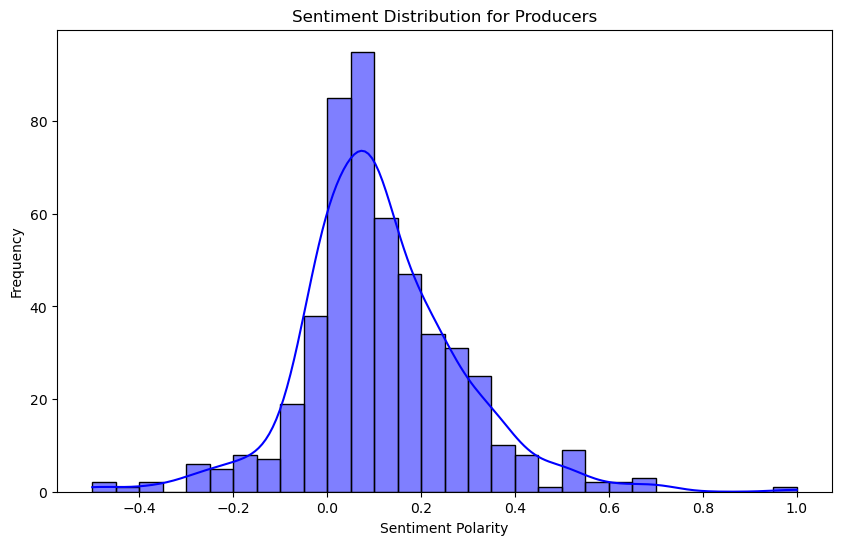

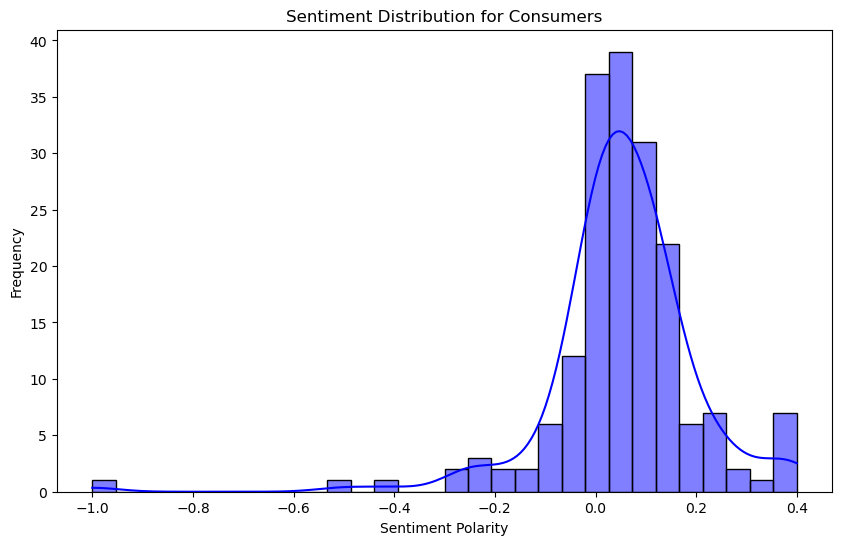

In [74]:
# Plot sentiment distribution for producers and consumers
plot_sentiment_distribution(data[data['user_type'] == 'Producer'], 'Producers')
plot_sentiment_distribution(data[data['user_type'] == 'Consumer'], 'Consumers')

C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_29112\1639851092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])


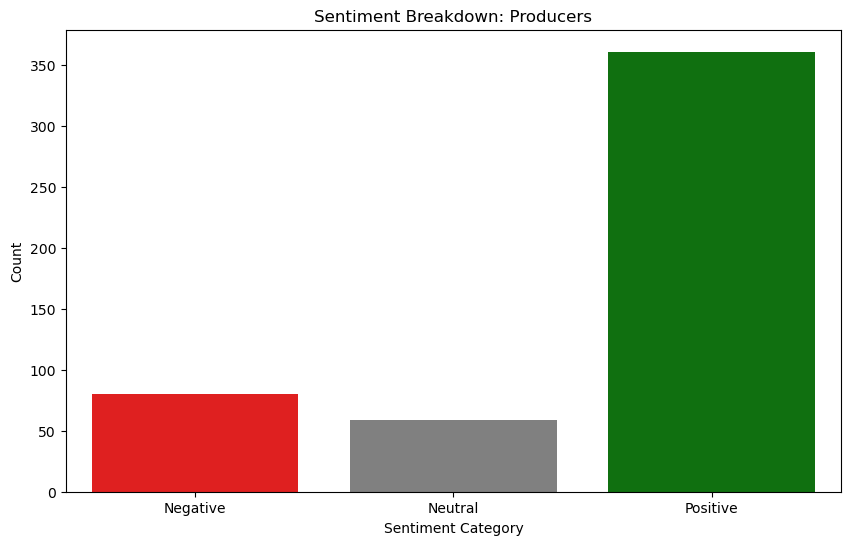

C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_29112\1639851092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])


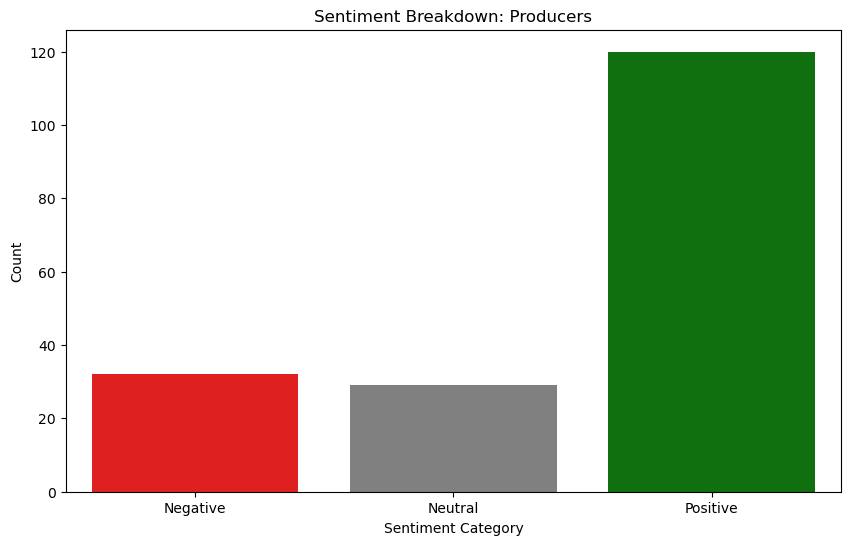

In [75]:
# Function to create a barchart to show breakdown per sentiment category
def create_barchart(data, title):
    data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sentiment_category', data=data, palette=['red', 'gray', 'green'])
    plt.title('Sentiment Breakdown: Producers')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Count')
    plt.show()
    
# Create word clouds for producers and consumers
create_barchart(data[data['user_type'] == 'Producer'], 'Producers')
create_barchart(data[data['user_type'] == 'Consumer'], 'Consumers')

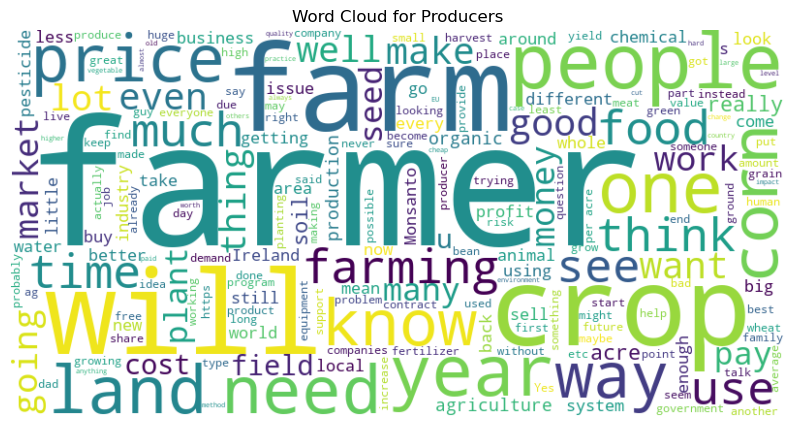

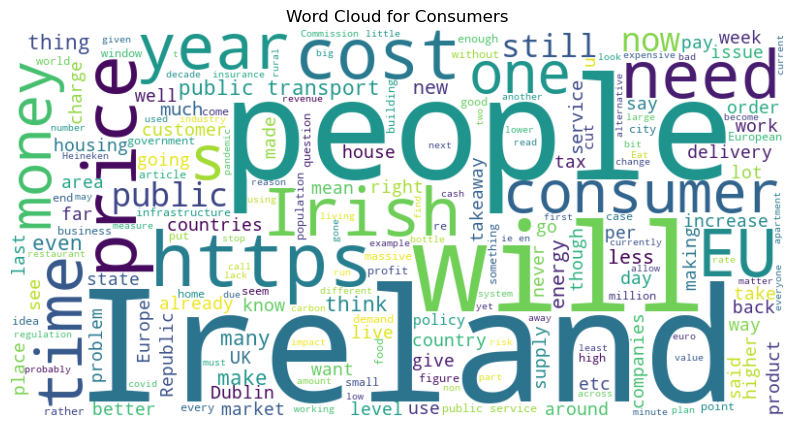

In [76]:
# Function to create a word cloud
def create_word_cloud(data, title):
    text = ' '.join(data['title'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {title}')
    plt.show()

# Create word clouds for producers and consumers
create_word_cloud(data[data['user_type'] == 'Producer'], 'Producers')
create_word_cloud(data[data['user_type'] == 'Consumer'], 'Consumers')